In [218]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from matplotlib import pyplot as plt

In [270]:

def mnist(shuffle=True, batch_size=64):
    # exchange with the corrupted mnist dataset
    # train = torch.randn(50000, 784)
    # test = torch.randn(10000, 784)

    train_images = []
    train_labels = []
    for i in range(5):
        data = np.load(f"../../../data/corruptmnist/train_{i}.npz")
        [train_images.append(img) for img in data["images"]]
        [train_labels.append(label) for label in data["labels"]]

    train_images = np.array(train_images)
    # reshape to  (n_immgs, channels, pixels, pixels)
    train_images = train_images.reshape(train_images.shape[0],1,28,28)
    train_labels = np.array(train_labels)

    # if shuffle == True:
    #     np.random.seed(12)
    #     # Get a random permutation of the indices
    #     perm = np.random.permutation(train_images.shape[0])

    #     train_images = train_images[perm]
    #     train_labels = train_labels[perm]

    train = [torch.tensor(train_images), torch.tensor(train_labels)]

    test_images = []
    test_labels = []
    data = np.load("../../../data/corruptmnist/test.npz")
    [test_images.append(img) for img in data["images"]]
    [test_labels.append(label) for label in data["labels"]]

    test_images = np.array(test_images)
    test_images = test_images.reshape(test_images.shape[0],1,28,28)
    test_labels = np.array(test_labels)
    test = [torch.tensor(test_images), torch.tensor(test_labels)]

    train_dataset = TensorDataset(train[0], train[1]) # create your datset
    train_loader = DataLoader(train_dataset, batch_size=batch_size) # create your dataloader

    test_dataset = TensorDataset(test[0], test[1]) # create your datset
    test_loader = DataLoader(test_dataset, batch_size=batch_size) # create your dataloader

    return train_loader, test_loader

trainloader, testloader = mnist(shuffle=False)

torch.Size([64, 1, 28, 28])
2


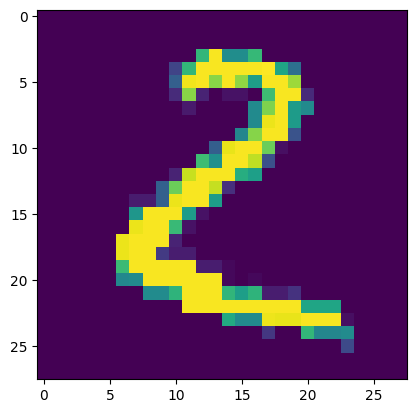

In [272]:
image, label = next(iter(testloader))

print(image.shape)
# helper.imshow(image[0,:]);
# image = image.numpy().transpose((1, 2, 0))
image = image.reshape(64, 28,28)

print(label[1].item())
plt.imshow(image[1,:], interpolation='nearest')
plt.show()

In [245]:
image[0][0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], dtype=torch.float64)

In [216]:
images = torch.Tensor(train[0].reshape(64,1,28,28))
labels = torch.Tensor(train[1])
images.shape

train_dataset = TensorDataset(images, labels) # create your datset
train_loader = DataLoader(train_dataset, batch_size=64) # create your dataloader

from matplotlib import pyplot as plt

image, label = next(iter(train_loader))
# helper.imshow(image[0,:]);

print(label[0].item())
plt.imshow(image[0,:], interpolation='nearest')
plt.show()

ValueError: cannot reshape array of size 19600000 into shape (64,1,28,28)